# For nice plots


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap

from miscellanea import *
from tapm import utils

In [2]:
def prettify(ax):
    # set ticks position
    ax.set_xticks([0, 100, 200])
    ax.set_yticks([0, 50, 100])
    
    # remove ticks labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # increase thickness of ticks
    ax.tick_params(width=1)
    # increase thickness of box
    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(1)

colors = ["#8c2d04", "#ec7014", "#fec44f"]

def discretize_cmaps(cmap, N):
    cmap = plt.colormaps[cmap]
    colors = cmap(np.linspace(0, 1, N))
    res = ListedColormap(colors)
    res.set_bad("#ABABAB")
    return res



Lx = 18/5
Ly = 9/5

# converts Lx from cm to inches
Lx = Lx / 2.54
Ly = Ly / 2.54

# Parameters of the system and basic function definitions

In [3]:
# Parameters
args, y0 = utils.read_params(filename="model_params.txt")


# Final Figure

In [4]:
# Define the ranges for H and P values
Hs = np.linspace(0, 0.2, 101)
Ps = np.linspace(0, 1.0, 201)

# Define the specific values for lambda_P and beta_STI
lambda_P_values = np.array([4,2,1]) /360
beta_STI_values = np.array([3, 5, 7]) * 0.0016

results = {}


for beta_STI in beta_STI_values:
    obSTI = args["beta_STI"]
    args["beta_STI"] = beta_STI  # Override the beta_STI value in args
    for lambda_P in lambda_P_values:
        result = np.zeros((len(Hs), len(Ps)))
        for i, H in enumerate(Hs):
            for j, P in enumerate(Ps):
                m = calculate_m(H,args)
                lambda_a = calculate_lambda_a(args, lambda_P, m, P, H)
                lambda_s = calculate_lambda_s(args, lambda_a)
                alpha = calculate_alpha(P, m, args)
                a = calculate_a(args, lambda_s)
                b = calculate_b(args, lambda_a)
                S = calculate_S(args, lambda_P, H, P)
                if calculate_Ro(args, lambda_P, H, P) > 1:
                    result[i, j] = (
                        beta_STI
                        * ((1 - m) * (1 - P) + P)
                        * S
                        * (
                            calculate_I_Assymp(args, lambda_P, H, P)
                            + calculate_I_Symp(args, lambda_P, H, P)
                        )
                    )
        results[(beta_STI, lambda_P)] = result
    args["beta_STI"] = obSTI  # Reset the beta_STI value in



In [5]:
# Determine the global vmin and vmax
all_infections = np.concatenate(
    [
        results[(beta_STI, lambda_P)].flatten()
        for beta_STI in beta_STI_values
        for lambda_P in lambda_P_values
    ]
)
global_vmin = np.min(all_infections)
global_vmax = np.max(all_infections)

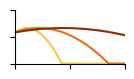

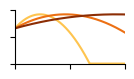

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(Lx, Ly))
indx_beta = 1
beta_STI = beta_STI_values[indx_beta]
for indx_lambda, lambda_P in enumerate(lambda_P_values):
    data = results[(beta_STI, lambda_P)]
    Y = data[0,:]
    ax.plot(Ps, Y, color = colors[2-indx_lambda], label="H = 0")
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.003/100, 0.003)
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.0015, 0.003])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #save the figure as a pdf. transparent=True makes the background transparent
    fig.savefig(f"../../figures/fig_2_beta_1.pdf", transparent=True)

fig, ax = plt.subplots(1, 1, figsize=(Lx, Ly))
indx_beta = 2
beta_STI = beta_STI_values[indx_beta]
for indx_lambda, lambda_P in enumerate(lambda_P_values):
    data = results[(beta_STI, lambda_P)]
    Y = data[0,:]
    ax.plot(Ps, Y, color = colors[2-indx_lambda], label="H = 0")
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.003/100, 0.003)
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.0015, 0.003])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #save the figure as a pdf. transparent=True makes the background transparent
    fig.savefig(f"../../figures/fig_2_beta_2.pdf", transparent=True)



        


C:\Users\nel_t\AppData\Local\Temp\ipykernel_1672\1836460927.py:51: UserWarning: Adding colorbar to a different Figure <Figure size 141.732x70.8661 with 1 Axes> than <Figure size 14.1732x162.992 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(c1, cax=ax)


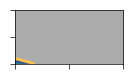

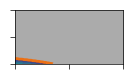

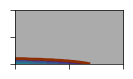

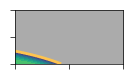

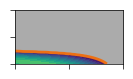

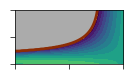

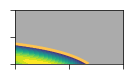

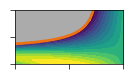

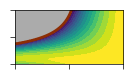

In [89]:
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

# plot panel D: beta_STI= 0.008, lambda_P= 4
global_vmin = np.min(all_infections)
global_vmax = np.max(all_infections)

for indx_beta, beta_STI in enumerate(beta_STI_values):
    for indx_lambda, lambda_P in enumerate(lambda_P_values):
        fig, ax = plt.subplots(figsize=(Lx, Ly))
        res_infections = results[(beta_STI, lambda_P)].copy()
        
        data = res_infections.copy()
        threshold = 0.00003
        
        # Find where data < threshold and set it to np.nan
        # 
        data[data < threshold] = np.nan 
        #masked_data = np.ma.masked_less(data, threshold)


        # print the heatmap with a fixed number of colors:
        my_cmap = discretize_cmaps("viridis", 15)

        
        # set all the res_infections < 0.01 to np.nan

        cax = ax.imshow(data, origin="lower", vmin=global_vmin, vmax=global_vmax, cmap = my_cmap)



        prettify(ax)
        # reduce the thickness of the box
        for axis in ["top", "bottom", "left", "right"]:
            ax.spines[axis].set_linewidth(0.5)
        # reduce the thickness of the ticks
        ax.tick_params(width=0.5)

        # add countour for R0=1, res_infections = 0)
        ax.contour(res_infections, levels=[threshold], colors=colors[2-indx_lambda], linewidths=2)

        fig.savefig(f"../../figures/fig4_{indx_beta+1}{indx_lambda}.pdf", transparent=True)


c1 = cax

# Create a new figure and axis for the colorbar
fig, ax = plt.subplots(figsize=(Lx/10, Ly*2.3))  # Adjust the figure size to fit the colorbar
fig.colorbar(c1, cax=ax)
# remove the tickslabel
ax.set_yticks([0,0.0015,0.003])
ax.set_yticklabels([])

# Save the colorbar figure
plt.savefig('../../figures/colorbar_only.pdf', bbox_inches='tight', pad_inches=0.1,transparent=True)
plt.show()

In [82]:
fig, ax = plt.subplots(figsize=(Lx/15, Ly*2.2))  # Adjust the figure size to fit the colorbar
fig.colorbar(c1, cax=ax)
# remove the tickslabel
ax.set_yticks([0,0.0015,0.003])
ax.set_yticklabels([])
# reduce the thickness of the ticks
ax.tick_params(width=0.5)
# reduce the thickness of the box
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(0)

# Save the colorbar figure
fig.savefig('../../figures/colorbar_only.pdf', bbox_inches='tight', pad_inches=0.1,transparent=True)
fig.show()

C:\Users\nel_t\AppData\Local\Temp\ipykernel_1672\2305170912.py:2: UserWarning: Adding colorbar to a different Figure <Figure size 177.165x88.5827 with 1 Axes> than <Figure size 11.811x194.882 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(c1, cax=ax)
C:\Users\nel_t\AppData\Local\Temp\ipykernel_1672\2305170912.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [66]:
# plot the N_new for P=0 and all the other sets

res1 = np.zeros((len(lambda_P_values), len(beta_STI_values), len(Ps)))

for indx_lambda, lambda_P in enumerate(lambda_P_values):
    for indx_beta, beta_STI in enumerate(beta_STI_values):
        res1[indx_lambda, indx_beta, :] = results[(beta_STI, lambda_P)][0, :]

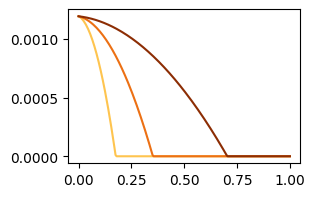

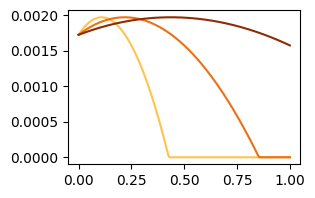

In [67]:
fig, axs = plt.subplots(1, 1, figsize=(3, 2))

axs.plot(Ps, res1[0, 0, :], label=r"$\lambda_P=4$", color=colors[2])
axs.plot(Ps, res1[1, 0, :], label=r"$\lambda_P=2$", color=colors[1])
axs.plot(Ps, res1[2, 0, :], label=r"$\lambda_P=1$", color=colors[0])

fig, axs = plt.subplots(1, 1, figsize=(3, 2))

axs.plot(Ps, res1[0, 1, :], label=r"$\lambda_P=4$", color=colors[2])
axs.plot(Ps, res1[1, 1, :], label=r"$\lambda_P=2$", color=colors[1])
axs.plot(Ps, res1[2, 1, :], label=r"$\lambda_P=1$", color=colors[0])

